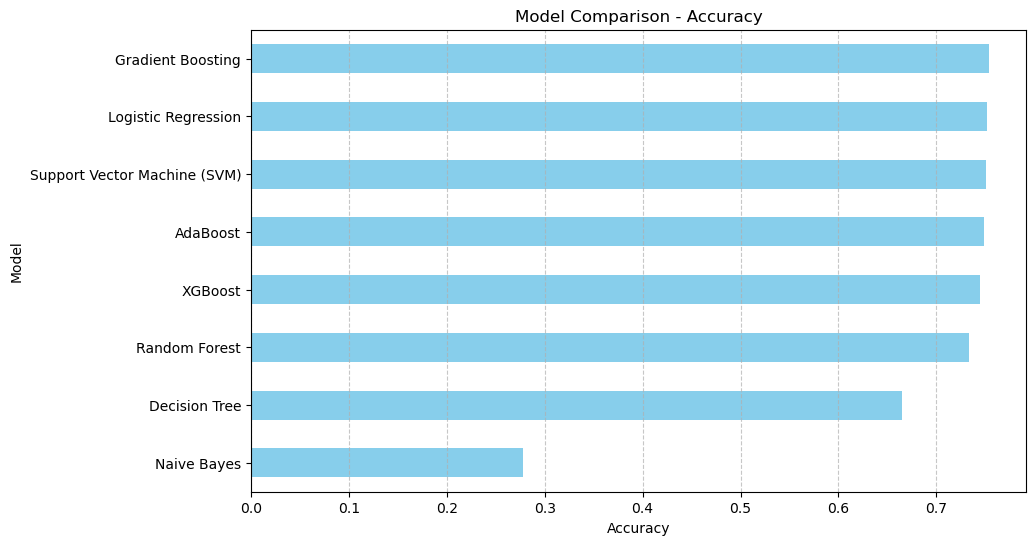

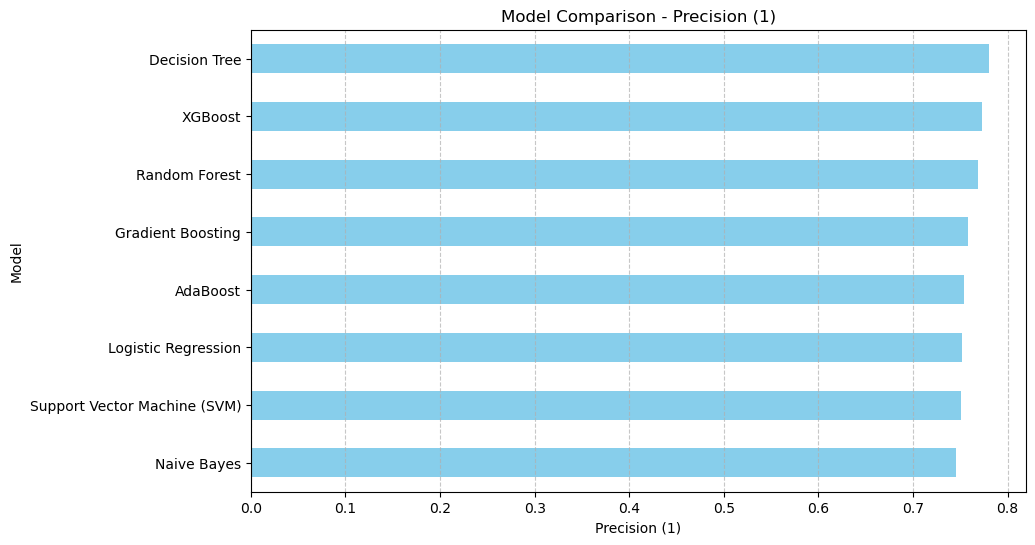

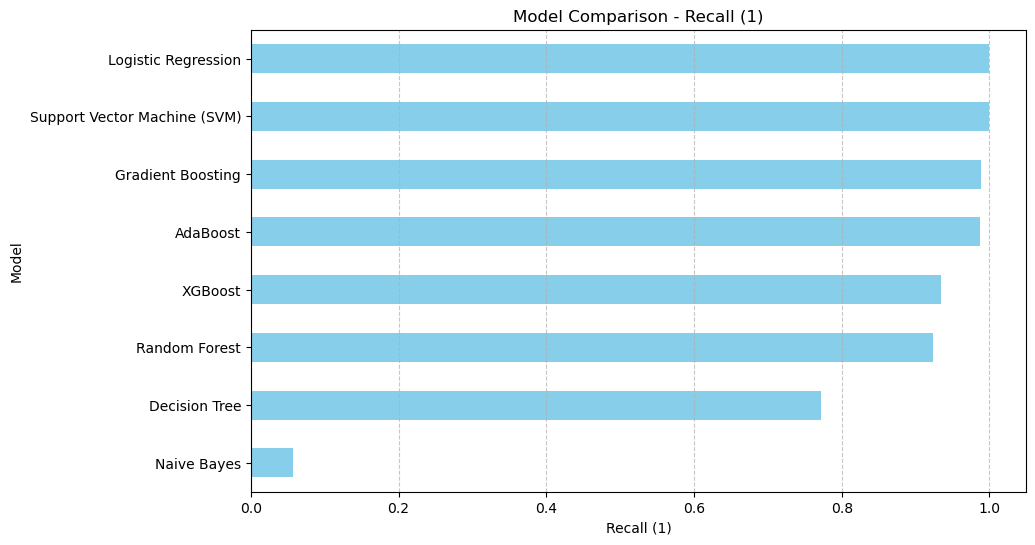

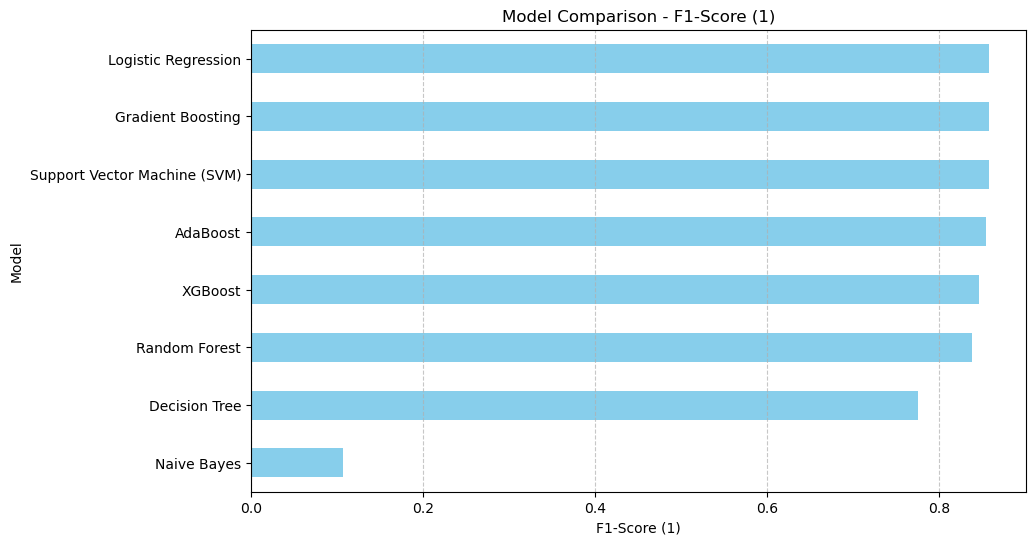


Model Performance Metrics
                              Accuracy  Precision (1)  Recall (1)  \
Logistic Regression           0.751308       0.751429    0.999367   
Decision Tree                 0.665240       0.780269    0.771374   
Random Forest                 0.733238       0.768177    0.923369   
Support Vector Machine (SVM)  0.750832       0.751071    0.999367   
AdaBoost                      0.748455       0.754114    0.986700   
Gradient Boosting             0.753685       0.757649    0.987967   
XGBoost                       0.744650       0.772775    0.934769   
Naive Bayes                   0.277699       0.745902    0.057631   

                              F1-Score (1)  
Logistic Regression               0.857842  
Decision Tree                     0.775796  
Random Forest                     0.838654  
Support Vector Machine (SVM)      0.857609  
AdaBoost                          0.854870  
Gradient Boosting                 0.857614  
XGBoost                           0.

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load dataset
file_path = "Data_Source/Global_Economy_Indicators.csv"
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Sort by Country and Year to calculate GDP growth
data_sorted = data.sort_values(by=["CountryID", "Year"])

data_sorted["GDP Growth"] = data_sorted.groupby("CountryID")["Gross Domestic Product (GDP)"].diff()
data_sorted["GDP Growth Indicator"] = (data_sorted["GDP Growth"] > 0).astype(int)

# Drop rows with NaN target (first year of each country)
data_cleaned = data_sorted.dropna(subset=["GDP Growth Indicator"])

# Define features and target
excluded_columns = ["CountryID", "Country", "Year", "Currency", "GDP Growth", "GDP Growth Indicator"]
features = data_cleaned.drop(columns=excluded_columns)
target = data_cleaned["GDP Growth Indicator"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Naive Bayes": GaussianNB(),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report

# Convert results to DataFrame
results_df = pd.DataFrame({
    model: {
        "Accuracy": metrics["accuracy"],
        "Precision (1)": metrics["1"]["precision"],
        "Recall (1)": metrics["1"]["recall"],
        "F1-Score (1)": metrics["1"]["f1-score"],
    }
    for model, metrics in results.items()
}).T

# Plotting performance metrics
metrics_to_plot = ["Accuracy", "Precision (1)", "Recall (1)", "F1-Score (1)"]
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    results_df[metric].sort_values().plot(kind="barh", color="skyblue")
    plt.title(f"Model Comparison - {metric}")
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

# Print results
def print_results_table(df):
    print("\nModel Performance Metrics")
    print("=" * 50)
    print(df)

print_results_table(results_df)
